In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

# Homework 5

## Exercise 1: Correlations
Let's recreate the plot from the lecture. Assume two neurons that are tuned to a directed stimulus $s\in[-\pi, \pi]$. The neurons are Poisson neurons with rates (in Hz)
\begin{align}
r_1(s) &= \exp\left(\cos(s)\right) \\
r_2(s) &= \exp\left(\cos\left(s - \frac{\pi}{4}\right)\right)
\end{align}

a) Draw 10,000 stimuli uniformly. Draw spike counts for a measurement duration of 10 seconds and save the firing rates. Discretize the range for the stimuli into 20 bins and compute the tuning curves (average firing rate). Plot the tuning curve. Additionally, pick one bin and plot all firing rates for that bin as a scatter plot. (3 points)

*Hint: If you have trouble properly binning, this is exactly one of the tasks were LLMs are useful. However, remember that you are responsible for whatever you submit.*

b) For this one bin, scatter plot the firing rates. Compute and plot the noise correlation. (1 point)

c) Scatter plot the simulated tuning curves. Compute and plot the signal correlation. (1 point)

d) Confirm law of total covariance by computing all of its components. (1 point)

e) Now we conduct a different experiment with only 2 stimuli: $s_1 = 0$ and $s_2=\frac{\pi}{4}$. Draw 1000 stimuli each and create a scatter plot of the firing rate responses. In the same plot, illustrate the covariance and the decision boundary. (2 points)

*Hint: If necessary use libraries and LLMs to plot the elements. Please submit clean code. Especially LLMs tend to generate nasty and unnecessarily long code. You are responsible for what you submit.*

f) Brainstorm at least three biologically plausible ways how noise covariances could appear in our measurements. Discuss whether they can be positive or negative. (1,5 points)

*Hint: You are allowed and encouraged to use the forum for an open exchange among students for this.*

g) Choose one model that allows for positive and negative noise correlations and implement it. Repeat the plot from e) and discuss whether the noise correlations support or obstruct decoding. (2 points)

h) Repeat g) for a different set of stimuli that have a different signal correlation. (1 bonus point)

In [2]:
# parameters
n_trials = 10_000
t_max = 10
n_bins = 20
bins = np.linspace(-np.pi, np.pi, n_bins + 1, endpoint = True)
bins_middle = (bins[1:] + bins[:-1]) / 2

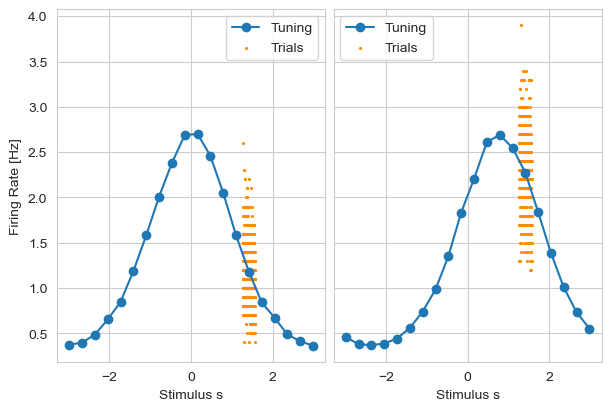

In [3]:
np.random.seed(42)

# Generate 10,000 stimuli uniformly in the range [-pi, pi]
stimuli = np.random.uniform(-np.pi, np.pi, n_trials)

# Compute the firing rates for each stimulus
r1 = np.exp(np.cos(stimuli))
r2 = np.exp(np.cos(stimuli - np.pi / 4))

# Simulate spike counts for a 10-second measurement duration
spike_counts1 = np.random.poisson(r1 * t_max)
spike_counts2 = np.random.poisson(r2 * t_max)

# Discretize the range [-pi, pi] into 20 bins and compute average firing rates
bin_indices = np.digitize(stimuli, bins) - 1

avg_firing_rates1 = np.zeros(n_bins)
avg_firing_rates2 = np.zeros(n_bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

for i in range(n_bins):
    avg_firing_rates1[i] = np.mean(spike_counts1[bin_indices == i]) / t_max
    avg_firing_rates2[i] = np.mean(spike_counts2[bin_indices == i]) / t_max

selected_bin = 14
stimuli_indices = np.where(bin_indices == selected_bin)[0]

_, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (6, 4), sharey = True, constrained_layout = True)

axs[0].plot(bins_middle, avg_firing_rates1, marker = "o", label = "Tuning")
axs[0].scatter(stimuli[stimuli_indices], spike_counts1[stimuli_indices] / t_max, label = "Trials", s = 1.5, c = "darkorange")
axs[0].legend()
axs[0].set_xlabel("Stimulus s")
axs[0].set_ylabel("Firing Rate [Hz]")

axs[1].plot(bins_middle, avg_firing_rates2, marker = "o", label = "Tuning")
axs[1].scatter(stimuli[stimuli_indices], spike_counts2[stimuli_indices] / t_max, label = "Trials", s = 1.5, c = "darkorange")
axs[1].legend()
axs[1].set_xlabel("Stimulus s")

plt.show()

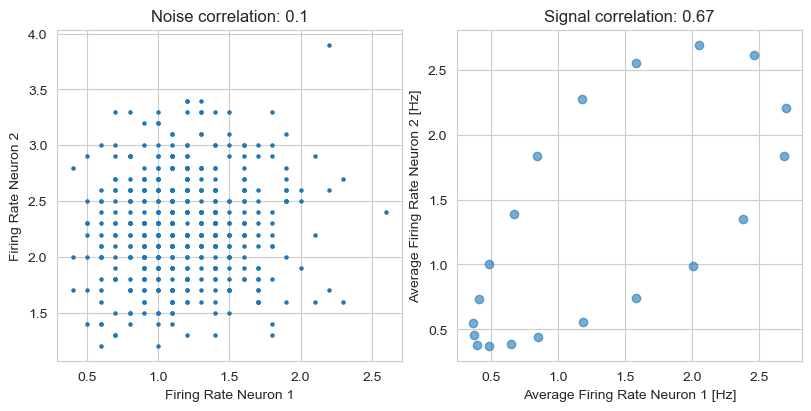

In [4]:
_, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 4), constrained_layout = True)

selected_bin = 14
stimuli_indices = np.where(bin_indices == selected_bin)[0]

fire_rate1 = spike_counts1[stimuli_indices] / t_max
fire_rate2 = spike_counts2[stimuli_indices] / t_max

noise_correlation = np.corrcoef(fire_rate1, fire_rate2)[0, 1]
signal_correlation = np.corrcoef(avg_firing_rates1, avg_firing_rates2)[0, 1]

axs[0].scatter(fire_rate1, fire_rate2, s = 5)
axs[0].set_xlabel("Firing Rate Neuron 1")
axs[0].set_ylabel("Firing Rate Neuron 2")
axs[0].set_title(f"Noise correlation: {round(noise_correlation, 2)}")

axs[1].scatter(avg_firing_rates1, avg_firing_rates2, alpha = 0.6)
axs[1].set_xlabel("Average Firing Rate Neuron 1 [Hz]")
axs[1].set_ylabel("Average Firing Rate Neuron 2 [Hz]")
axs[1].set_title(f"Signal correlation: {round(signal_correlation, 2)}")

plt.show()

In [22]:
fire_rate1 = spike_counts1 / t_max
fire_rate2 = spike_counts2 / t_max

print("Total correlation")
print(np.cov(fire_rate1, fire_rate2))

print("Signal correlation")
print(np.cov(avg_firing_rates1, avg_firing_rates2))

bin_covariances = []
for i in range(n_bins):
    indices = np.where(bin_indices == i)[0]
    bin_cov = np.cov(fire_rate1[indices], fire_rate2[indices])
    bin_covariances.append(bin_cov)

print("Average noise correlation")
print(np.mean(bin_covariances, axis = 0))

print("Sum")
print(np.cov(avg_firing_rates1, avg_firing_rates2) + np.mean(bin_covariances, axis = 0))

print("Error")
print(np.cov(avg_firing_rates1, avg_firing_rates2) + np.mean(bin_covariances, axis = 0) - np.cov(fire_rate1, fire_rate2))

Total correlation
[[0.81346696 0.46323933]
 [0.46323933 0.80558684]]
Signal correlation
[[0.71132448 0.47553203]
 [0.47553203 0.70820709]]
Average noise correlation
[[0.13029057 0.00558893]
 [0.00558893 0.13172092]]
Sum
[[0.84161505 0.48112096]
 [0.48112096 0.83992801]]
Error
[[0.02814808 0.01788163]
 [0.01788163 0.03434117]]


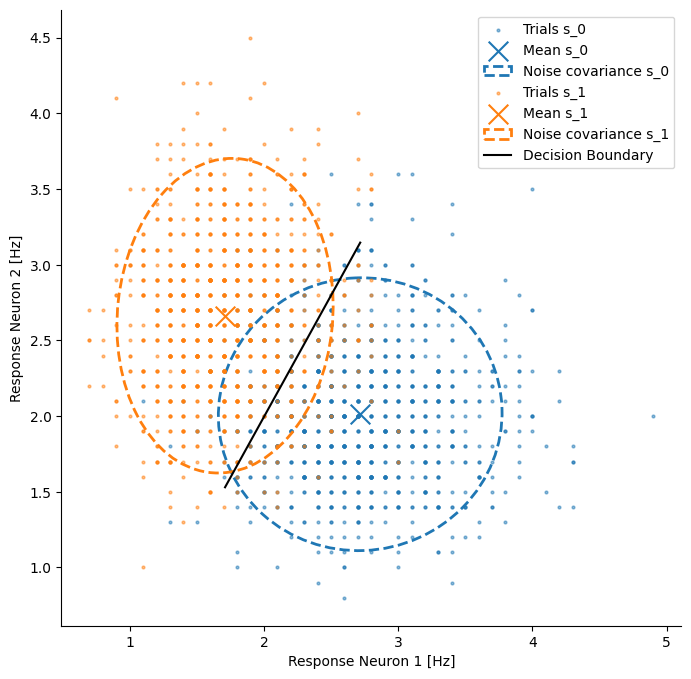

In [ ]:
# e)
n_trials = 1000
s_1 = 0
s_2 = 1
responses = np.zeros((2, 2, n_trials))

**Answer f)**

In [ ]:
# g)

**Answer g)**

In [ ]:
# h)